<a href="https://colab.research.google.com/github/ahmednoor2003/Python_Projects/blob/main/Skin_Cancer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
from glob import glob
from PIL import Image
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
# import autokeras as ak
from sklearn.metrics import confusion_matrix

In [2]:
# To prevent randomness in data augumntation while testin
np.random.seed(42)

In [3]:
# USE THIS FOR GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the provided meta data file, which contains image names, age, sex, and type of cancer
skin_df = pd.read_csv('/content/drive/My Drive/Skin cancer Dataset/HAM10000_metadata.csv')

In [5]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

/tmp/ipython-input-1848369455.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


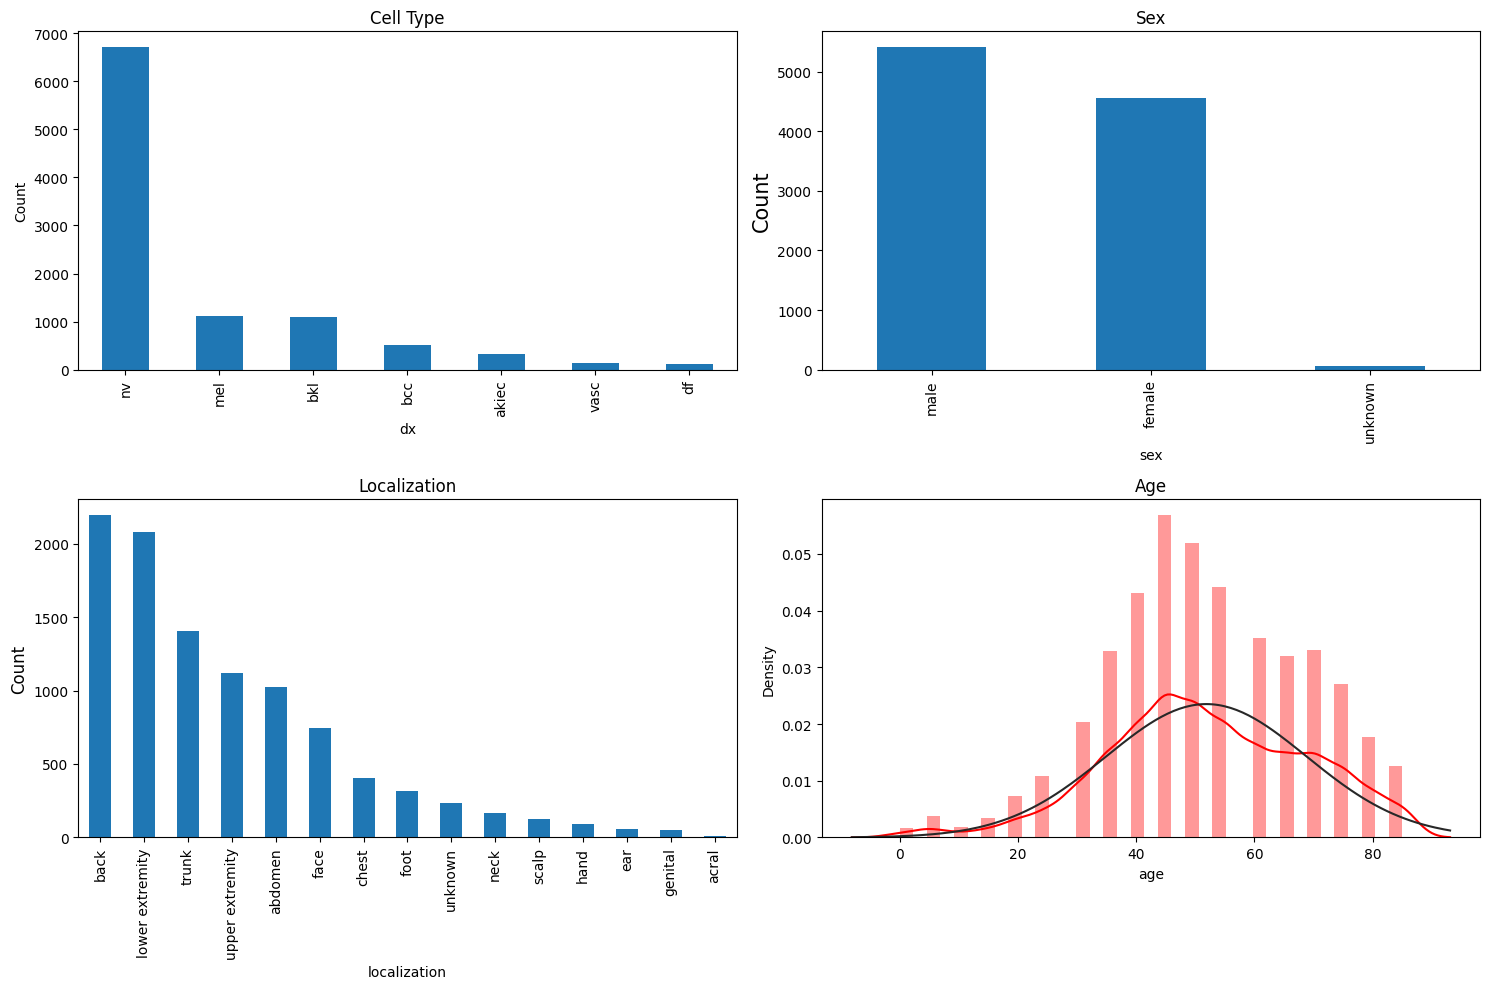

In [6]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [7]:
# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [8]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [9]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())


# Define paths to both folders
folder_1 = '/content/drive/My Drive/Skin cancer Dataset/HAM10000_images_part_1'
folder_2 = '/content/drive/My Drive/Skin cancer Dataset/HAM10000_images_part_2'

# Collect image paths from both folders
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for folder in [folder_1, folder_2]
              for x in glob(os.path.join(folder, '*.jpg'))}

# Output the total number of images collected
print(f"Total images collected: {len(image_path)}")


label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64
Total images collected: 10058


In [10]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [11]:
skin_df_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/drive/My Drive/Skin cancer Dataset/HA...
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/drive/My Drive/Skin cancer Dataset/HA...
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/drive/My Drive/Skin cancer Dataset/HA...
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/drive/My Drive/Skin cancer Dataset/HA...
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/drive/My Drive/Skin cancer Dataset/HA...


**The Smart Loading Cell**

In [15]:
import glob
import re
import tensorflow as tf

def load_skin_cancer_model(specific_model_name=None):
    save_dir = '/content/drive/My Drive/Skin cancer Dataset/Saved Models'
    base_name = "ham10000_custom_cnn_best"

    # SCENARIO A: The user asked for a specific model
    if specific_model_name:
        load_path = os.path.join(save_dir, specific_model_name)
        if not os.path.exists(load_path):
            print(f"❌ Error: Could not find '{specific_model_name}' in {save_dir}")
            return None

    # SCENARIO B: The user wants the latest model automatically
    else:
        existing_models = glob.glob(os.path.join(save_dir, f"{base_name}*.keras"))

        if not existing_models:
            print(f"❌ Error: No models found in {save_dir}!")
            return None

        highest_num = 0
        latest_model_path = existing_models[0] # Default fallback

        # Scan for the highest version number
        for path in existing_models:
            match = re.search(r'_(\d+)\.keras$', path)
            if match:
                num = int(match.group(1))
                if num > highest_num:
                    highest_num = num
                    latest_model_path = path

        # If no numbered models exist, it will just load the original un-numbered one if it exists
        if highest_num == 0 and os.path.exists(os.path.join(save_dir, f"{base_name}.keras")):
             latest_model_path = os.path.join(save_dir, f"{base_name}.keras")

        load_path = latest_model_path

    print(f"⏳ Loading model from: {load_path}...")
    loaded_model = tf.keras.models.load_model(load_path)
    print("✅ Model loaded successfully!")
    return loaded_model

# ==========================================
# HOW TO USE THIS FUNCTION:
# ==========================================

# Example 1: Load the absolute latest model automatically
model = load_skin_cancer_model()

# Example 2: Load a specific older model to test it
# model = load_skin_cancer_model("ham10000_custom_cnn_best_1.keras")

⏳ Loading model from: /content/drive/My Drive/Skin cancer Dataset/Saved Models/ham10000_custom_cnn_best.keras...
✅ Model loaded successfully!


In [16]:
import numpy as np
from PIL import Image
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm  # This gives us a progress bar

SIZE = 128

# 1. Define a standard function instead of a lambda
def load_and_resize(path):
    return np.asarray(Image.open(path).resize((SIZE, SIZE)))

# 2. Extract all the paths into a list
paths = skin_df_balanced['path'].tolist()

print(f"Loading and resizing {len(paths)} images in parallel...")

# 3. Use multithreading to process multiple images at once
# max_workers=8 is usually the sweet spot for Colab's CPU
with ThreadPoolExecutor(max_workers=8) as executor:
    # tqdm wraps around it to show you a live progress bar so you know it hasn't frozen!
    processed_images = list(tqdm(executor.map(load_and_resize, paths), total=len(paths)))

# 4. Assign the results back to your dataframe
skin_df_balanced['image'] = processed_images

Loading and resizing 3500 images in parallel...


100%|██████████| 3500/3500 [03:44<00:00, 15.58it/s]


In [17]:
n_samples = 5

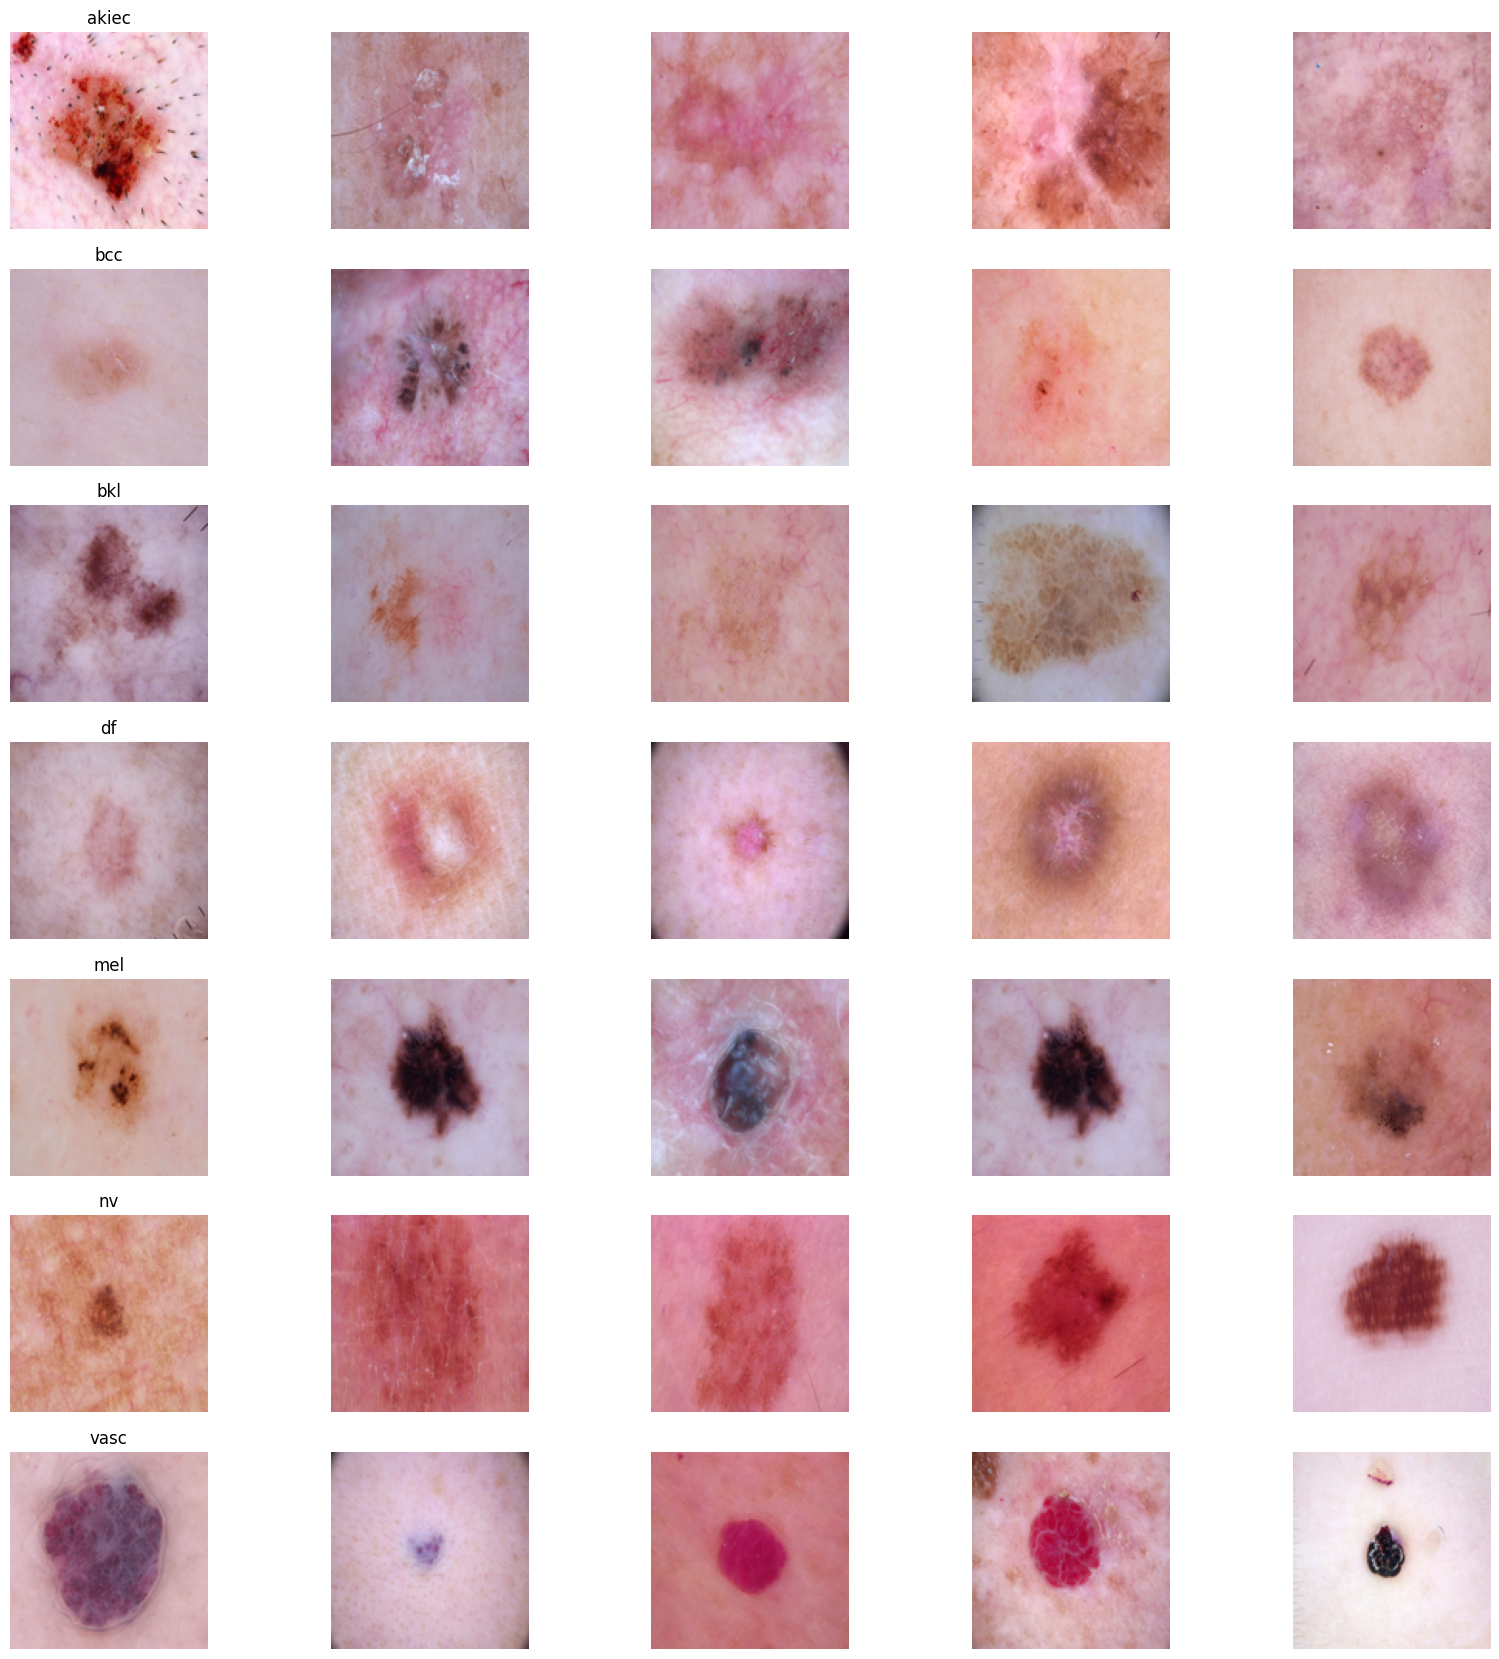

In [18]:
# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [19]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Define the Augmentation Layer
# This will randomly flip, rotate, and zoom the training images to make the model robust
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2), # Rotate up to 20%
  layers.RandomZoom(0.1),     # Zoom in/out up to 10%
  layers.RandomContrast(0.1)  # Slight contrast adjustments for lighting differences
], name="augmentation_layer")

# 2. Define the CNN Architecture
# We are bumping the input shape to 128x128 for better XAI heatmaps later
input_shape = (128, 128, 3)
num_classes = 7

model = models.Sequential([
    # Input Layer
    layers.InputLayer(input_shape=input_shape),

    # Apply Augmentation (Only active during model.fit)
    data_augmentation,

    # Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(), # Added to stabilize and speed up training

    # Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer for 7 classes
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augmentation_layer (Sequential) │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,933,191 (129.44 MB)

 Trainable params: 33,931,271 (129.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

**Model Training**

In [ ]:
# Train
#You can also use generator to use augmentation during training.

batch_size = 16
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


Epoch 1/50
165/165 - 20s - 120ms/step - accuracy: 0.3509 - loss: 2.0916 - val_accuracy: 0.2114 - val_loss: 3.0095
Epoch 2/50
165/165 - 9s - 55ms/step - accuracy: 0.4126 - loss: 1.7800 - val_accuracy: 0.2514 - val_loss: 2.4204
Epoch 3/50
165/165 - 9s - 56ms/step - accuracy: 0.4545 - loss: 1.5960 - val_accuracy: 0.2377 - val_loss: 2.4445
Epoch 4/50
165/165 - 9s - 54ms/step - accuracy: 0.4690 - loss: 1.5163 - val_accuracy: 0.4651 - val_loss: 1.3863
Epoch 5/50
165/165 - 9s - 56ms/step - accuracy: 0.5006 - loss: 1.3507 - val_accuracy: 0.2160 - val_loss: 7.4078
Epoch 6/50
165/165 - 9s - 56ms/step - accuracy: 0.5330 - loss: 1.2897 - val_accuracy: 0.4309 - val_loss: 1.7594
Epoch 7/50
165/165 - 9s - 56ms/step - accuracy: 0.5410 - loss: 1.2291 - val_accuracy: 0.3543 - val_loss: 1.9657
Epoch 8/50
165/165 - 9s - 57ms/step - accuracy: 0.5577 - loss: 1.2146 - val_accuracy: 0.4069 - val_loss: 1.8722
Epoch 9/50
165/165 - 9s - 57ms/step - accuracy: 0.5634 - loss: 1.1925 - val_accuracy: 0.4171 - val_los

**The Auto-Versioning Save Cell**

In [ ]:
import os
import glob
import re

# Define the target directory and base filename
save_dir = '/content/drive/My Drive/Skin cancer Dataset/Saved Models'
base_name = "ham10000_custom_cnn_best"
extension = ".keras"

# Ensure the directory exists just in case
os.makedirs(save_dir, exist_ok=True)

# Find all existing models that match our naming scheme
existing_models = glob.glob(os.path.join(save_dir, f"{base_name}*{extension}"))

highest_num = 0

# Extract the numbers from the existing filenames using Regular Expressions (Regex)
for model_path in existing_models:
    # This looks for "_[number].keras" at the end of the file path
    match = re.search(r'_(\d+)\.keras$', model_path)
    if match:
        num = int(match.group(1))
        if num > highest_num:
            highest_num = num

# Increment to get the new version number
next_num = highest_num + 1
new_model_name = f"{base_name}_{next_num}{extension}"
save_path = os.path.join(save_dir, new_model_name)

# Save the model
model.save(save_path)
print(f"✅ Model successfully saved as: {new_model_name}")
print(f"📁 Full path: {save_path}")

New and improved model saved!


In [21]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

Calculating SHAP values... this may take a moment.


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_163
Received: inputs=['Tensor(shape=(3, 128, 128, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_163
Received: inputs=['Tensor(shape=(50, 128, 128, 3))']
  warnings.warn(msg)


Generating SHAP Explanation Plot:


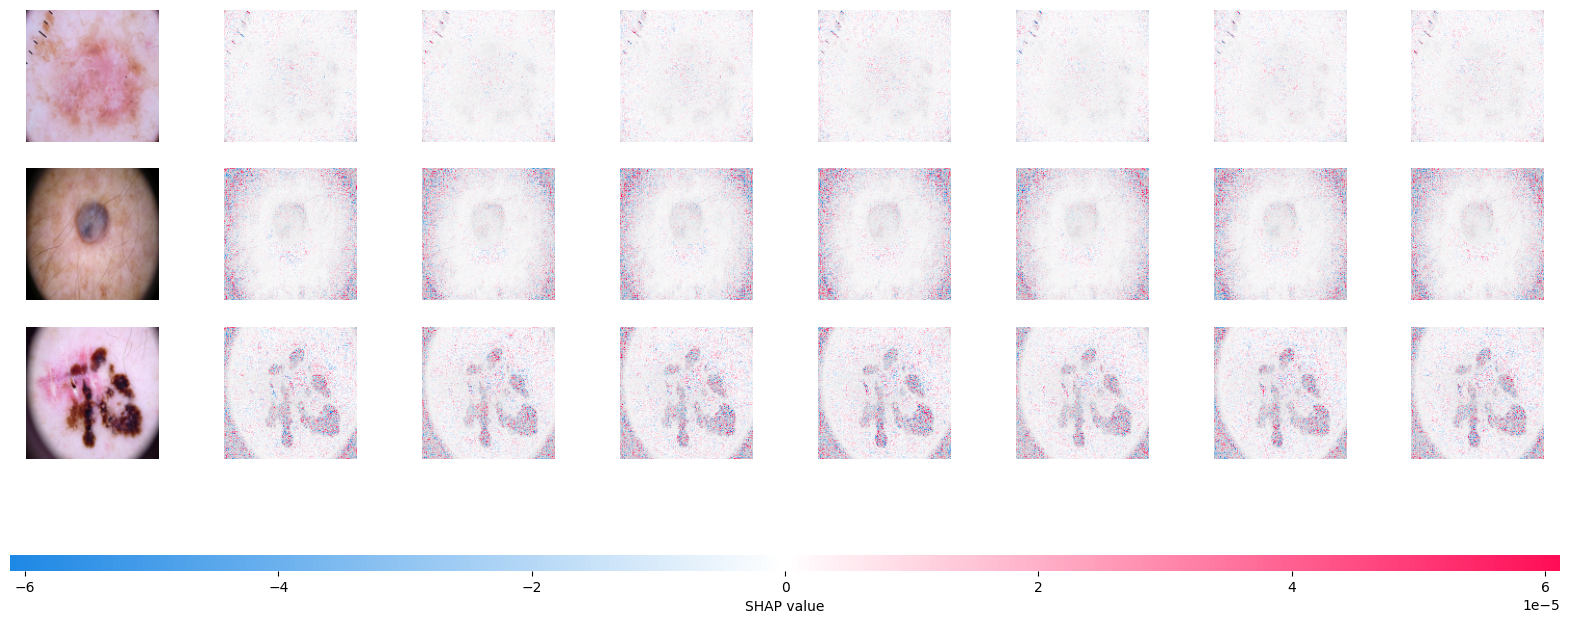

In [22]:
import shap
import numpy as np
import tensorflow as tf

# 1. Grab background and test images, forcing them to be standard Numpy arrays
background = np.array(x_train[np.random.choice(x_train.shape[0], 50, replace=False)])
test_images = np.array(x_test[0:3])

# 2. Initialize the Explainer
explainer = shap.GradientExplainer(model, background)

# 3. Calculate SHAP values
print("Calculating SHAP values... this may take a moment.")
shap_values = explainer.shap_values(test_images)

# 4. CRITICAL FIX: Clean the data structure for the plotter.
# Depending on your specific version of TF/Keras, SHAP outputs different formats.
# This block ensures it is a clean list of Numpy arrays, exactly what image_plot needs.
if isinstance(shap_values, tf.Tensor):
    shap_values = shap_values.numpy()

if isinstance(shap_values, list):
    # If it's a list of tensors, convert each to a numpy array
    clean_shap_values = [np.array(s) for s in shap_values]
else:
    # If it output a single massive array, we slice it into a list by class
    clean_shap_values = [shap_values[..., i] for i in range(7)]

# 5. Plot! (Notice we pass the arrays directly, no axis swapping!)
print("Generating SHAP Explanation Plot:")
shap.image_plot(clean_shap_values, test_images)

In [23]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [24]:
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)


<Axes: >

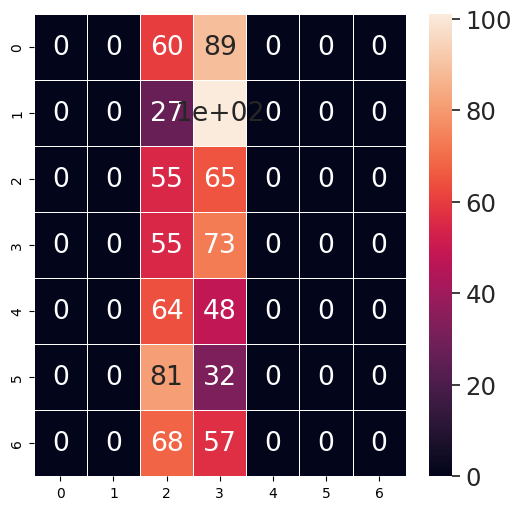

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

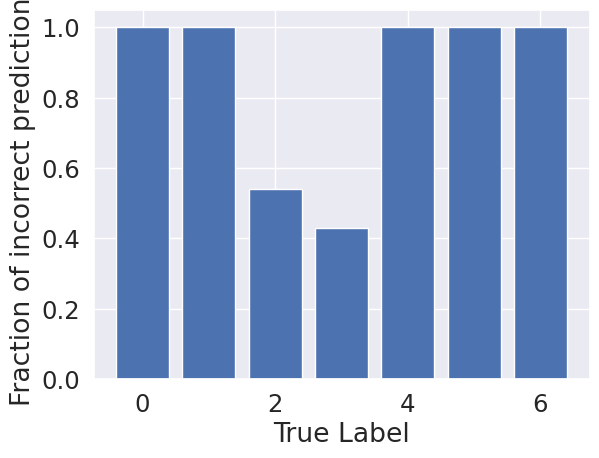

In [26]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

**Preloading Model**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import shap
from PIL import Image
from google.colab import files

In [ ]:
# ==========================================
# 1. LOAD THE SAVED MODEL
# ==========================================
# This brings your trained model back into memory so we don't have to retrain it.
print("Loading saved model...")
model = tf.keras.models.load_model('ham10000_custom_cnn_best.keras')
print("Model loaded successfully!")

# Classes in alphabetical order (based on your HAM10000 dataset)
class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


Loading saved model...


ValueError: File not found: filepath=ham10000_custom_cnn_best.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
d# ==========================================
# 2. IMAGE UPLOAD & PREPROCESSING FUNCTION
# ==========================================
def process_uploaded_image(uploaded_file_name, target_size=(128, 128)):
    # Open the image, resize it, and convert it to an array
    img = Image.open(uploaded_file_name).resize(target_size)
    img_array = np.asarray(img)

    # Add a "batch" dimension because the model expects (batch_size, width, height, colors)
    # So (128, 128, 3) becomes (1, 128, 128, 3)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded, img


In [ ]:
# ==========================================
# 3. GRAD-CAM EXPLAINER FUNCTION
# ==========================================
def generate_gradcam(img_array, model, alpha=0.4):
    # Find the last Convolutional layer automatically
    for layer in reversed(model.layers):
        if len(layer.output_shape) == 4:
            last_conv_layer = layer.name
            break

    # Create a mini-model to extract the visual feature maps
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer).output, model.output])

    # Record the math
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0]) # Get the winning class
        class_channel = preds[:, pred_index]

    # Calculate gradients and create heatmap
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    heatmap = last_conv_layer_output[0] @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap) # Normalize to 0-1

    # Colorize the heatmap using Matplotlib's 'jet' color scheme
    heatmap_uint8 = np.uint8(255 * heatmap.numpy())
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap_uint8]

    # Resize heatmap to match the original image (128x128)
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap).resize((128, 128))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Overlay heatmap on original image
    superimposed_img = jet_heatmap * alpha + img_array[0]
    return tf.keras.utils.array_to_img(superimposed_img), pred_index.numpy(), preds[0].numpy()

In [ ]:
# ==========================================
# 4. EXECUTION SCRIPT (Upload -> Predict -> XAI)
# ==========================================
print("\n--- Please upload a skin lesion image (.jpg or .png) ---")
uploaded = files.upload() # Opens the Colab file upload dialog

for filename in uploaded.keys():
    print(f"\nProcessing {filename}...")

    # Process image
    img_array, original_img = process_uploaded_image(filename)

    # Get Grad-CAM and Predictions
    gradcam_img, predicted_class_idx, probabilities = generate_gradcam(img_array, model)
    predicted_label = class_names[predicted_class_idx]
    confidence = probabilities[predicted_class_idx] * 100

    print(f"\n>>> PREDICTION: {predicted_label} (Confidence: {confidence:.2f}%) <<<")

    # --- Plotting Grad-CAM ---
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_img)
    plt.title(f"Grad-CAM (Focus area for {predicted_label})")
    plt.axis('off')
    plt.show()

    # --- Plotting SHAP ---
    print("\nGenerating SHAP Math Explanation...")
    # NOTE: SHAP needs a background to compare against.
    # We use a pure black image (zeros) as a neutral baseline for inference.
    background_baseline = np.zeros((10, 128, 128, 3))
    explainer = shap.GradientExplainer(model, background_baseline)
    shap_values = explainer.shap_values(img_array)

    # Clean SHAP format for plotting
    if isinstance(shap_values, tf.Tensor): shap_values = shap_values.numpy()
    if isinstance(shap_values, list): clean_shap_values = [np.array(s) for s in shap_values]
    else: clean_shap_values = [shap_values[..., i] for i in range(7)]

    # Draw SHAP
    shap.image_plot(clean_shap_values, img_array)